In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
%matplotlib inline 

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA 
from sklearn.manifold import TSNE
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.manifold import SpectralEmbedding
from sklearn.manifold import Isomap
from sklearn.decomposition import PCA, KernelPCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
import timeit
from sklearn.tree import export_graphviz
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import xgboost as xgb

# Note:

    1.This notebook contains all the codes for the first part of assignment 3

    2.This notebook of codes are accumulation of all the codes that we ran during experimenting with out data.    We used book Jupyter Notebook and google Colab platform for experimenting with all classical machine learning algorithms.
    
    3.Some of the codes were run in google colab. Particularly, the gridsearchCV took hours of time. Those codes are pasted here without running.

### Reading the data: Learn about the data 

In [4]:
df = pd.read_csv('train.csv')

In [5]:
df_test = pd.read_csv('testX.csv')

In [6]:
df.shape, df_test.shape

((60000, 786), (10000, 785))

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 786 entries, Id to 784
dtypes: int64(786)
memory usage: 359.8 MB


In [9]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Id,60000.0,39999.500000,17320.652413,10000.0,24999.75,39999.5,54999.25,69999.0
Label,60000.0,2.002933,1.415000,0.0,1.00,2.0,3.00,4.0
1,60000.0,0.000483,0.061507,0.0,0.00,0.0,0.00,14.0
2,60000.0,0.006067,0.292286,0.0,0.00,0.0,0.00,45.0
3,60000.0,0.033700,1.178115,0.0,0.00,0.0,0.00,218.0
...,...,...,...,...,...,...,...,...
780,60000.0,17.967350,45.225807,0.0,0.00,0.0,0.00,255.0
781,60000.0,8.525333,29.529071,0.0,0.00,0.0,0.00,255.0
782,60000.0,2.753883,17.396211,0.0,0.00,0.0,0.00,255.0
783,60000.0,0.832950,9.263115,0.0,0.00,0.0,0.00,255.0


In [11]:
X = pd.DataFrame(df.iloc[: , 2:])
y = pd.DataFrame (df.iloc[:,1:2 ])

In [12]:
X.shape, y.shape

((60000, 784), (60000, 1))

Let us now try to figure out if we can have any idea about the classes. We will randomly plot to see if we can make sense of the plot to assign any name

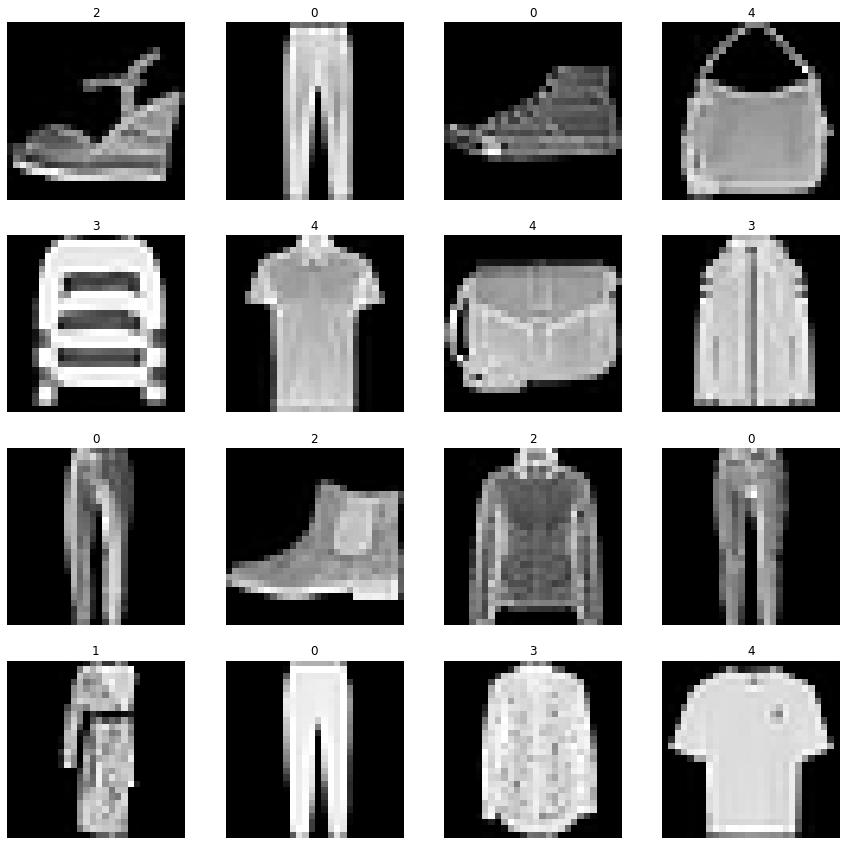

In [13]:
fig, axes = plt.subplots(4, 4, figsize = (15,15))
for row in axes:
    for axe in row:
        index = np.random.randint(60000)
        img = X.values[index].reshape(28,28)
        cloths = y['Label'][index]
        axe.imshow(img, cmap='gray')
        axe.set_title(cloths)
        axe.set_axis_off()

### Exporing the Test Data 

Test data

In [14]:
X_test = pd.DataFrame(df_test.iloc[:,1:]) 
X_test_id = pd.DataFrame(df_test.iloc[:,0:1])

In [15]:
X_test.shape, X_test_id.shape

((10000, 784), (10000, 1))

### Exploring the Training Data 

In [16]:
df['Label'].value_counts()

4    12067
2    11994
1    11986
3    11978
0    11975
Name: Label, dtype: int64

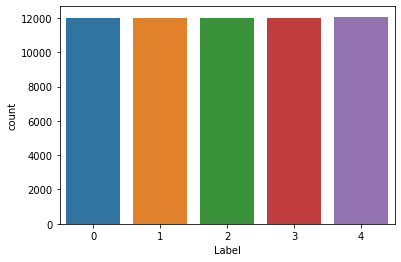

In [17]:
sns.countplot(x = 'Label', data = df)

### Feature Engineering: Feature Selection 

In [18]:
df.isnull().sum()/len(df)

Id       0.0
Label    0.0
1        0.0
2        0.0
3        0.0
        ... 
780      0.0
781      0.0
782      0.0
783      0.0
784      0.0
Length: 786, dtype: float64

We don't have any missing value in our dataset

### Training and test split

In [20]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((48000, 784), (12000, 784), (48000, 1), (12000, 1))

In [22]:
X_train.head()

,1,2,3,4,5,6,7,8,9,10,...,775,776,777,778,779,780,781,782,783,784
48572,0,0,0,0,0,0,0,0,0,0,...,4,0,0,0,3,4,1,0,0,0
38696,0,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
13611,0,0,0,0,0,0,0,127,11,5,...,121,110,63,57,0,0,0,0,0,0
35213,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
31766,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


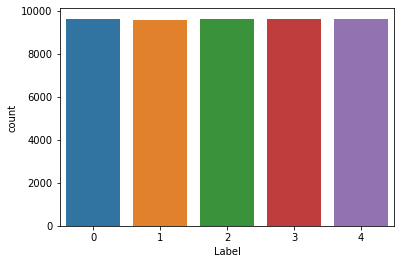

In [23]:
sns.countplot(x = 'Label', data = y_train)

In [24]:
y_train['Label'].value_counts()

2    9630
3    9611
4    9601
0    9596
1    9562
Name: Label, dtype: int64

### Label binarizing y for ROC curve production for Multiclass problem

In [25]:
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4])

In [26]:
y_bin

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [27]:
X_train_roc, X_val_roc, y_train_roc, y_val_roc = train_test_split(X, y_bin, test_size=0.2, random_state=42)

### Feature Scaling: Normalizing the data

### Min max scaling

In [28]:
scaler_min = MinMaxScaler()
X_train_min = scaler_min.fit_transform(X_train)
X_val_min = scaler_min.transform(X_val)
X_test_min = scaler_min.transform(X_test)

In [29]:
X_train.shape, X_val.shape, y_train.shape, y_val.shape, X_test.shape

((48000, 784), (12000, 784), (48000, 1), (12000, 1), (10000, 784))

In [30]:
X_train_min.shape, X_val_min.shape, y_train.shape, y_val.shape, X_test_min.shape

((48000, 784), (12000, 784), (48000, 1), (12000, 1), (10000, 784))

### Standar Scaling 

In [31]:
scaler = StandardScaler()
X_train_sc = scaler.fit_transform (X_train)
X_val_sc = scaler.transform (X_val)
X_test_sc = scaler.transform(X_test)

### Visualization 

### PCA for visualization

In [33]:
pca_4 = PCA(n_components=4)
X_pca4 = pca_4.fit(X_train_min).transform(X_train_min)

X_val_pca4= pca_4.fit(X_val_min).transform(X_val_min)


Text(0.5, 0.98, '4-Component PCA')

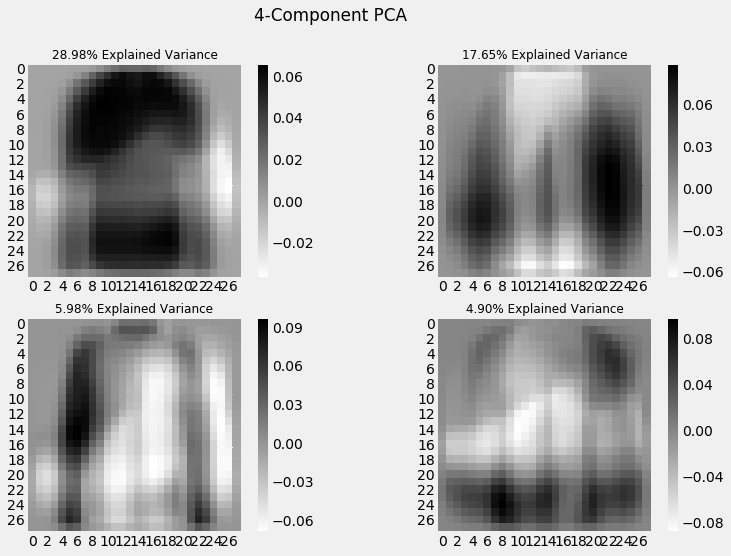

In [39]:
plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

sns.heatmap(pca_4.components_[0].reshape(28, 28), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca_4.components_[1].reshape(28, 28), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca_4.components_[2].reshape(28, 28), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca_4.components_[3].reshape(28, 28), ax=axarr[1][1], cmap='gray_r')

axarr[0][0].set_title(
    "{0:.2f}% Explained Variance".format(pca_4.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[0][1].set_title(
    "{0:.2f}% Explained Variance".format(pca_4.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[1][0].set_title(
    "{0:.2f}% Explained Variance".format(pca_4.explained_variance_ratio_[2]*100),
    fontsize=12
)
axarr[1][1].set_title(
    "{0:.2f}% Explained Variance".format(pca_4.explained_variance_ratio_[3]*100),
    fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')

In [40]:
pca_v_df= pd.DataFrame(X_pca4, columns=['Component 1', 'Component 2', 'Component 3', 'Component 4'])

Text(0.5, 1.0, 'PCA')

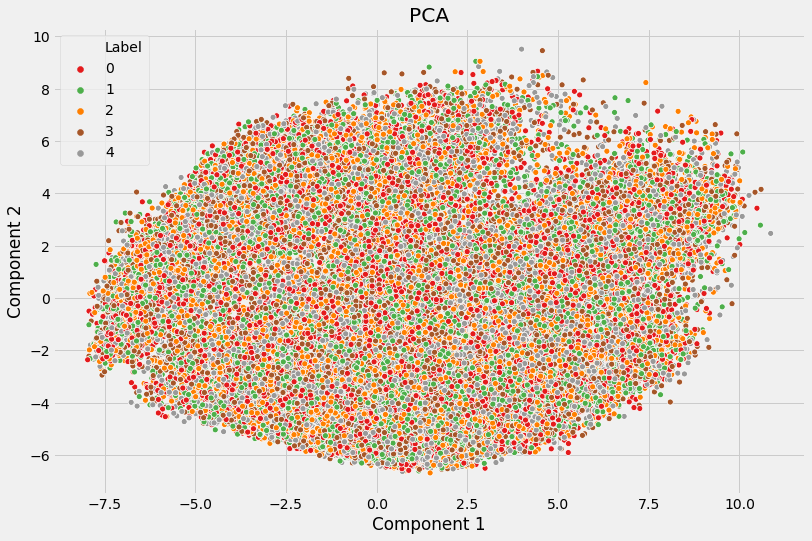

In [42]:
plt.figure(figsize= (12,8))
sns.scatterplot(x=pca_v_df['Component 1'], y=pca_v_df['Component 2'], 
                data=pca_v_df, hue=y ['Label'], palette='Set1',legend='full')
plt.title ('PCA')

### t_SNE

In [12]:
from sklearn.manifold import TSNE

In [75]:
start= timeit.default_timer()
d_tsne = TSNE(n_components=2).fit_transform(X)
stop= timeit.default_timer()
time_tsne= stop - start
print (time_tsne) 

tsne_df= pd.DataFrame(d_tsne, columns=['Component 1', 'Component 2'])

# tsne_df['Label']=target.values

tsne_df.head()

5869.978752741001


NameError: name 'target' is not defined

In [76]:
tsne_df

,Component 1,Component 2
0,11.921441,-0.266171
1,4.339219,-34.424541
2,-8.249701,-4.850786
3,11.607504,-8.832189
4,19.480328,-38.042671
...,...,...
59995,44.151104,-19.517843
59996,-43.251217,9.182215
59997,36.136303,33.995914
59998,-48.408703,22.611229


Text(0.5, 1.0, 't-SNE')

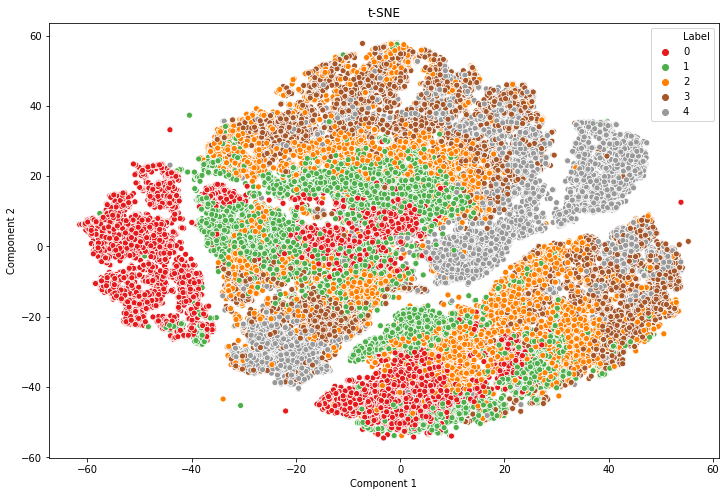

In [77]:
plt.figure(figsize= (12,8))
sns.scatterplot(x=tsne_df['Component 1'], y=tsne_df['Component 2'], 
                data=tsne_df, hue=y ['Label'], palette='Set1',legend='full')
plt.title ('t-SNE')

### Kernle PCA 

In [ ]:
stop= timeit.default_timer()

kpca = KernelPCA(n_components=2, kernel='rbf', random_state=42)
d_kpca = kpca.fit_transform(X)

stop= timeit.default_timer()

time_kpca= stop - start


kpca_df= pd.DataFrame(d_kpca, columns=['Component 1', 'Component 2'])

print (time_kpca)

In [ ]:
plt.figure(figsize= (12,8))
sns.scatterplot(x=kpca_df['Component 1'], y=kpca_df['Component 2'], 
                data=kpca_df, hue=y ['Label'], palette='Set1',legend='full')
plt.title ('Kenel PCA')



### LLE

In [28]:
X.shape


(60000, 784)

In [29]:
start= timeit.default_timer()
lle=LocallyLinearEmbedding(n_components=2)

d_lle= lle.fit_transform(X)
stop= timeit.default_timer()
time_LLE= stop - start
print (time_LLE) 

lle_df = pd.DataFrame(d_lle, columns=['Component 1', 'Component 2'])

lle_df.head()

5743.970441596999


,Component 1,Component 2
0,-0.004071,0.001881
1,-0.004071,0.004360
2,-0.004070,0.000072
3,-0.004071,0.002189
4,-0.004071,0.004391


In [31]:
lle_df.shape

(60000, 2)

Text(0.5, 1.0, 'Locally Linear Embedding (LLE)')

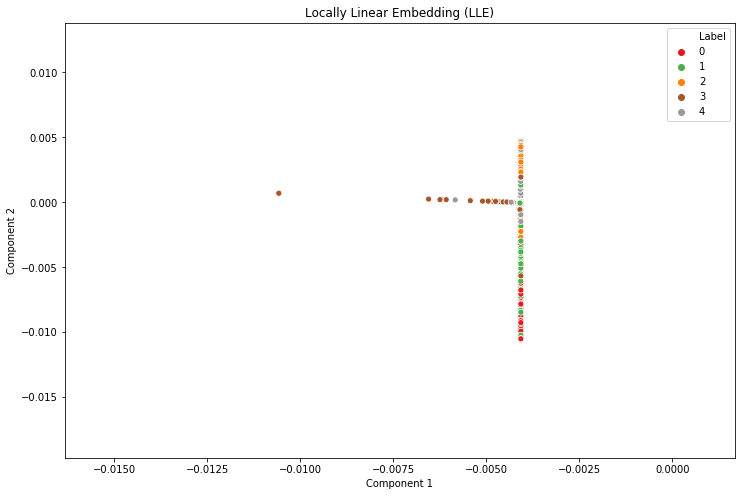

In [30]:
plt.figure(figsize= (12,8))
sns.scatterplot(x=lle_df['Component 1'], y=lle_df['Component 2'], 
                data=lle_df, hue=y['Label'], palette='Set1',legend='full')
plt.title ('Locally Linear Embedding (LLE)')

### LDA

In [131]:
start= timeit.default_timer()
lda = LinearDiscriminantAnalysis(n_components=2).fit_transform(X_train, y_train)
stop= timeit.default_timer()
time_lda= stop - start
print (time_lda) 

lda_df= pd.DataFrame(lda, columns=['Component 1', 'Component 2'])

# tsne_df['Label']=target.values

tsne_df.head()

/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


22.245412825999665


,Component 1,Component 2
0,11.921441,-0.266171
1,4.339219,-34.424541
2,-8.249701,-4.850786
3,11.607504,-8.832189
4,19.480328,-38.042671


Text(0.5, 1.0, 'LDA')

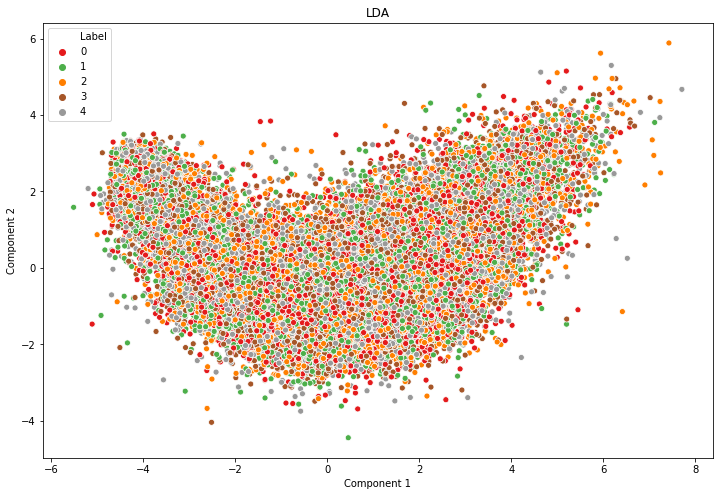

In [132]:
plt.figure(figsize= (12,8))
sns.scatterplot(x=lda_df['Component 1'], y=lda_df['Component 2'], 
                data=tsne_df, hue=y ['Label'], palette='Set1',legend='full')
plt.title ('LDA')

### Feature Extraction: Dimensionality Reduction by PCA

###  PCA all components 

In [55]:
pca_all = PCA(n_components=784)
X_pca_all = pca_all.fit(X_train_min).transform(X_train_min)
var_all= pca_all.explained_variance_ratio_

Text(0.5, 1.0, 'Figure 1 : Cumulative Explained Variance Captured')

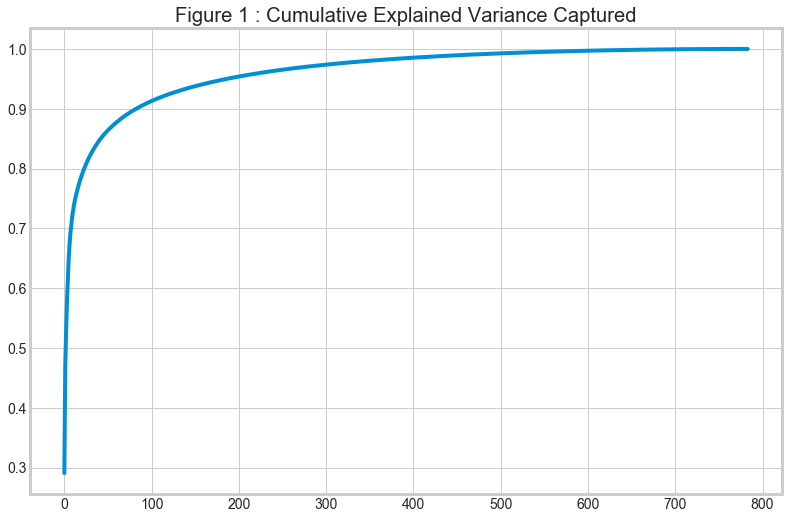

In [56]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(range(784), np.cumsum(var_all))
plt.title("Figure 1 : Cumulative Explained Variance Captured")

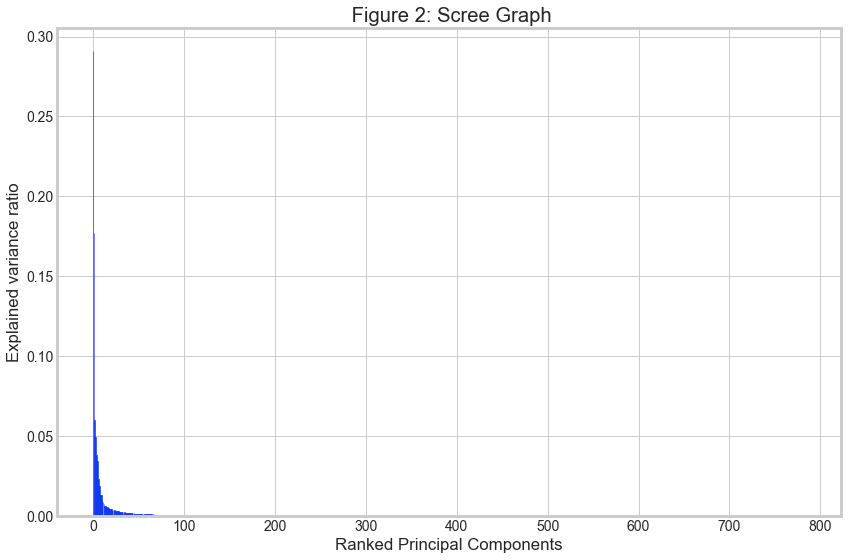

In [54]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
plt.bar(range (len(var_all)), var_all, align='center', edgecolor='blue')
plt.ylabel('Explained variance ratio')
plt.ylim()
plt.xlabel('Ranked Principal Components')
plt.title(" Figure 2: Scree Graph")
plt.tight_layout()

### PCA with 380 Components 

In [57]:
pca380 = PCA(n_components=380)
X_pca380 = pca380.fit(X_train_min).transform(X_train)
var380= pca380.explained_variance_ratio_

Text(0.5, 1.0, 'Figure 1 : Cumulative Explained Variance Captured')

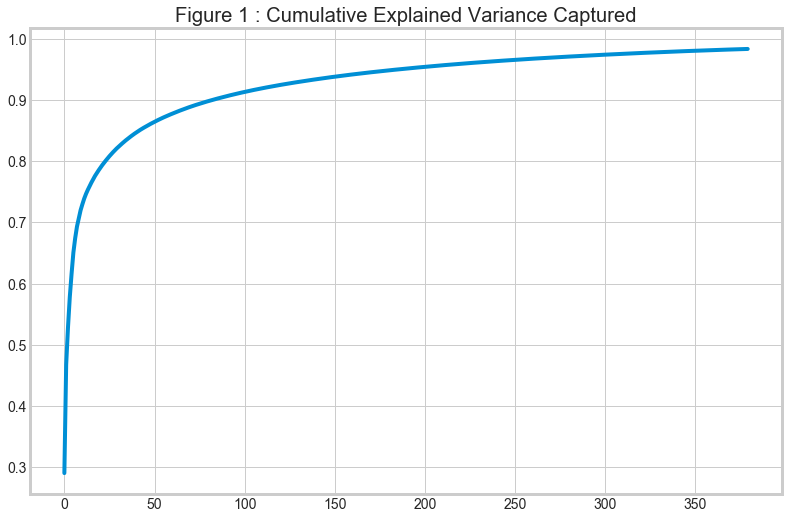

In [58]:
plt.figure(figsize=(12,8))

plt.plot(range(380), np.cumsum(var380))
plt.title("Figure 1 : Cumulative Explained Variance Captured")

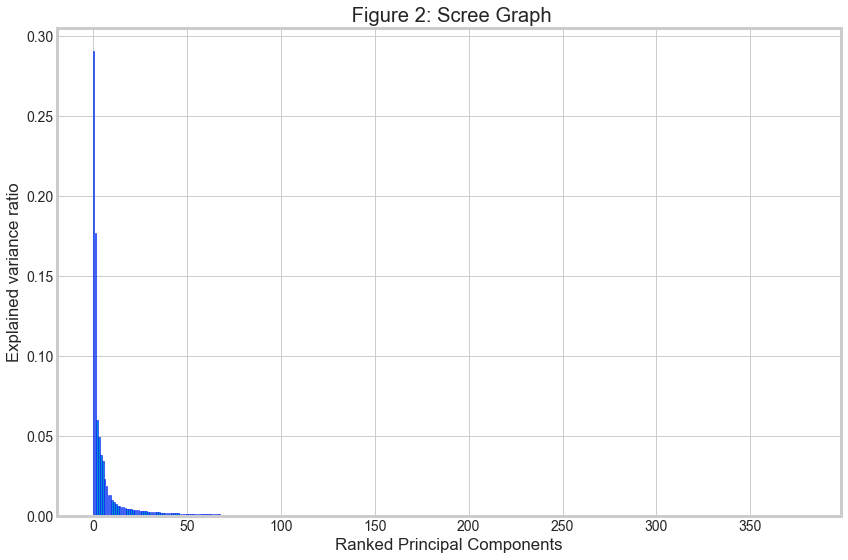

In [59]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
plt.bar(range (len(var380)), var380, align='center', edgecolor='blue')
plt.ylabel('Explained variance ratio')
plt.ylim()
plt.xlabel('Ranked Principal Components')
plt.title(" Figure 2: Scree Graph")
plt.tight_layout()

### PCA with 140 components 

In [60]:
pca140 = PCA(n_components=140)
X_pca140 = pca140.fit(X_train_min).transform(X_train_min)
var140= pca140.explained_variance_ratio_

# Fitting test data
X_test_pca = pca140.fit(X_test).transform(X_test_min)


# fitting X_val data:
X_val_pca140 = pca140.fit(X_val_min).transform(X_val_min)

Text(0.5, 1.0, 'Figure 1 : Cumulative Explained Variance Captured')

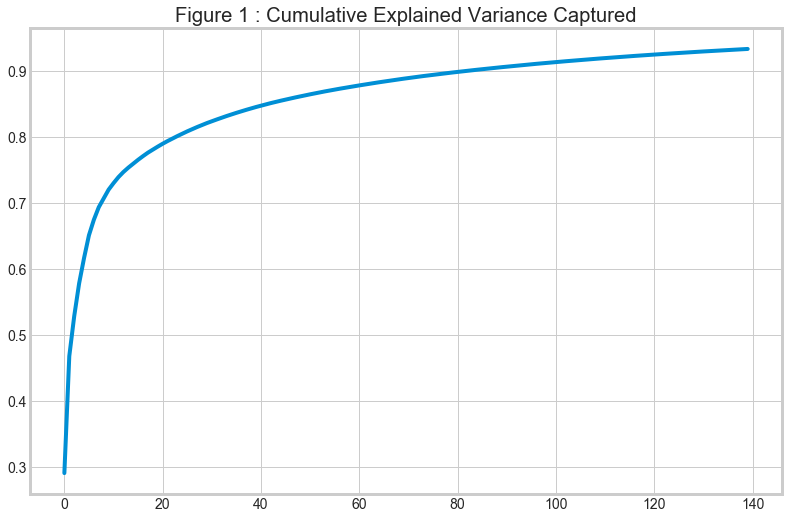

In [61]:
plt.figure(figsize=(12,8))

plt.plot(range(140), np.cumsum(var140))
plt.title("Figure 1 : Cumulative Explained Variance Captured")

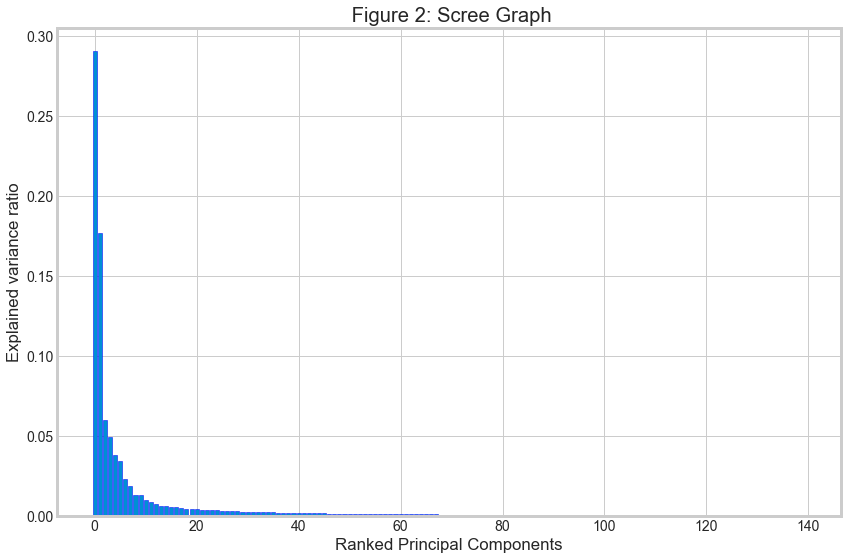

In [62]:
plt.figure(figsize=(12, 8))
sns.set_style('whitegrid')
plt.bar(range (len(var140)), var140, align='center', edgecolor='blue')
plt.ylabel('Explained variance ratio')
plt.ylim()
plt.xlabel('Ranked Principal Components')
plt.title(" Figure 2: Scree Graph")
plt.tight_layout()

In [63]:
X_pca140.shape, X_test_pca.shape, X_val_pca140.shape

((48000, 140), (10000, 140), (12000, 140))

In [64]:
for i in range (140):
  print ("{:.2f}% variance is explained by {} principal component".format (var140[i]*100, i+1))

29.07% variance is explained by 1 principal component
17.70% variance is explained by 2 principal component
6.04% variance is explained by 3 principal component
4.97% variance is explained by 4 principal component
3.84% variance is explained by 5 principal component
3.46% variance is explained by 6 principal component
2.35% variance is explained by 7 principal component
1.90% variance is explained by 8 principal component
1.34% variance is explained by 9 principal component
1.31% variance is explained by 10 principal component
0.99% variance is explained by 11 principal component
0.91% variance is explained by 12 principal component
0.77% variance is explained by 13 principal component
0.66% variance is explained by 14 principal component
0.61% variance is explained by 15 principal component
0.59% variance is explained by 16 principal component
0.55% variance is explained by 17 principal component
0.53% variance is explained by 18 principal component
0.46% variance is explained by 19 p

Text(0.5, 0.98, '4-Component PCA')

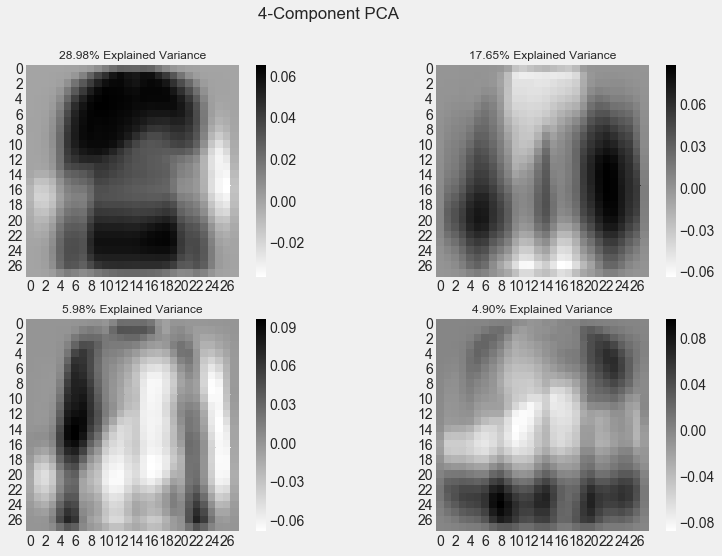

In [65]:
plt.style.use('fivethirtyeight')

fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

sns.heatmap(pca140.components_[0, :].reshape(28, 28), ax=axarr[0][0], cmap='gray_r')
sns.heatmap(pca140.components_[1, :].reshape(28, 28), ax=axarr[0][1], cmap='gray_r')
sns.heatmap(pca140.components_[2, :].reshape(28, 28), ax=axarr[1][0], cmap='gray_r')
sns.heatmap(pca140.components_[3, :].reshape(28, 28), ax=axarr[1][1], cmap='gray_r')

axarr[0][0].set_title(
    "{0:.2f}% Explained Variance".format(pca140.explained_variance_ratio_[0]*100),
    fontsize=12
)
axarr[0][1].set_title(
    "{0:.2f}% Explained Variance".format(pca140.explained_variance_ratio_[1]*100),
    fontsize=12
)
axarr[1][0].set_title(
    "{0:.2f}% Explained Variance".format(pca140.explained_variance_ratio_[2]*100),
    fontsize=12
)
axarr[1][1].set_title(
    "{0:.2f}% Explained Variance".format(pca140.explained_variance_ratio_[3]*100),
    fontsize=12
)
axarr[0][0].set_aspect('equal')
axarr[0][1].set_aspect('equal')
axarr[1][0].set_aspect('equal')
axarr[1][1].set_aspect('equal')

plt.suptitle('4-Component PCA')

#### PCA for doing experiment with less runtime 

From the variance explained, we can take up to 74 principal components as beyond that rest of components contribute to less than 1% of variance. This will be done for testing purpose. Final models will be tested with all features 

In [101]:
pca74 = PCA(n_components=74)
X_pca74 = pca74.fit(X_train_min).transform(X_train_min)
var74 = pca74.explained_variance_ratio_
# print (var74)

# fitting X_val data:
X_val_pca74 = pca74.fit(X_val_min).transform(X_val_min)

## KNN Classifier 

In [79]:
grid_params = {'n_neighbors' : [3,5,11,19, 25, 29, 35, 45, 51],
               'weights': ['uniform', 'distance'],
               'metric': ['euclidean', 'manhattan']}

In [80]:
X_pca140.shape

(48000, 140)

In [81]:
model_tuner = GridSearchCV(KNeighborsClassifier(),grid_params, cv=3, refit=True,verbose=3)
model_tuner.fit(X_pca140, np.ravel(y_train))
model_tuner.best_params_,  model_tuner.best_estimator_, model_tuner.best_score_

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.832, total=  37.5s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   37.5s remaining:    0.0s


[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.833, total=  32.3s
[CV] metric=euclidean, n_neighbors=3, weights=uniform ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:  1.2min remaining:    0.0s


[CV]  metric=euclidean, n_neighbors=3, weights=uniform, score=0.834, total=  38.5s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.835, total=  39.2s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.835, total=  39.7s
[CV] metric=euclidean, n_neighbors=3, weights=distance ...............
[CV]  metric=euclidean, n_neighbors=3, weights=distance, score=0.837, total=  39.1s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.842, total=  43.1s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.837, total=  34.0s
[CV] metric=euclidean, n_neighbors=5, weights=uniform ................
[CV]  metric=euclidean, n_neighbors=5, weights=uniform, score=0.845, tota

[CV]  metric=manhattan, n_neighbors=3, weights=uniform, score=0.794, total= 3.1min
[CV] metric=manhattan, n_neighbors=3, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=3, weights=uniform, score=0.799, total= 3.0min
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, score=0.801, total= 3.1min
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, score=0.799, total= 3.1min
[CV] metric=manhattan, n_neighbors=3, weights=distance ...............
[CV]  metric=manhattan, n_neighbors=3, weights=distance, score=0.806, total= 3.2min
[CV] metric=manhattan, n_neighbors=5, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=5, weights=uniform, score=0.810, total= 3.4min
[CV] metric=manhattan, n_neighbors=5, weights=uniform ................
[CV]  metric=manhattan, n_neighbors=5, weights=uniform, score=0.805, tota

[Parallel(n_jobs=1)]: Done 108 out of 108 | elapsed: 214.2min finished


({'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'},
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                      metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                      weights='distance'),
 0.8495833333333334)

Plotting the result against K-value

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(model_tuner.param_grid['n_neighbors']['uniform'], model_tuner.cv_results_['mean_test_score'],color='blue',linestyle='dashed', marker='o',markerfacecolor='red', markersize=10 )
plt.title('Mean Accuracy vs K-Value')
plt.xlabel('K-Value')
plt.ylabel('Mean Accuracy')

In [97]:
model_tuner.param_grid['n_neighbors'], model_tuner.cv_results_['mean_test_score']

([3, 5, 11, 19, 25, 29, 35, 45, 51],
 array([0.83339583, 0.83545833, 0.84127083, 0.84410417, 0.8466875 ,
        0.84958333, 0.84575   , 0.84833333, 0.84520833, 0.84727083,
        0.84304167, 0.84545833, 0.84195833, 0.8449375 , 0.839375  ,
        0.8423125 , 0.83808333, 0.8409375 , 0.79604167, 0.802125  ,
        0.808875  , 0.81258333, 0.81695833, 0.82104167, 0.81825   ,
        0.82108333, 0.81625   , 0.81947917, 0.815     , 0.81827083,
        0.81120833, 0.815375  , 0.80847917, 0.81227083, 0.80525   ,
        0.8095625 ]))

Printing the result against K-value

In [83]:
print("Gridsearch scores on K value:")
print()
means = model_tuner.cv_results_['mean_test_score']
stds = model_tuner.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, model_tuner.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std*2 , params))
print()

Gridsearch scores on K value:

0.833 (+/-0.002) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
0.835 (+/-0.002) for {'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}
0.841 (+/-0.006) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'uniform'}
0.844 (+/-0.005) for {'metric': 'euclidean', 'n_neighbors': 5, 'weights': 'distance'}
0.847 (+/-0.006) for {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'uniform'}
0.850 (+/-0.005) for {'metric': 'euclidean', 'n_neighbors': 11, 'weights': 'distance'}
0.846 (+/-0.006) for {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'uniform'}
0.848 (+/-0.005) for {'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
0.845 (+/-0.009) for {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'uniform'}
0.847 (+/-0.009) for {'metric': 'euclidean', 'n_neighbors': 25, 'weights': 'distance'}
0.843 (+/-0.007) for {'metric': 'euclidean', 'n_neighbors': 29, 'weights': 'uniform'}
0.845 (+/-0.007) for {

KNN Experiment with and without scaling

In [ ]:
# Without scaling of the dataset
import timeit
start = timeit.default_timer()
knn_model_best = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean', metric_params=None,
                                      n_jobs=None, n_neighbors=11, p=2, weights='distance')
stop = timeit.default_timer()
time_knn = stop - start
knn_model_best.fit(X_train, np.ravel(y_train))
pred_KNN_best = knn_model_best.predict(X_val)
print ("Time for KNN:" , time_knn)
print(confusion_matrix(y_val,pred_KNN_best))
print('\n')
print(classification_report(y_val,pred_KNN_best))

In [ ]:
# With minmax scaling of the dataset
import timeit
start = timeit.default_timer()
knn_min_all = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean', metric_params=None,
                                      n_jobs=None, n_neighbors=11, p=2, weights='distance')
stop = timeit.default_timer()
time_knn_min = stop - start

knn_min_all.fit(X_train_min, np.ravel(y_train))
pred_KNN_min_all = knn_min_all.predict(X_val_min)
print ("Time for KNN:" , time_knn_min)
print(confusion_matrix(y_val,pred_KNN_min_all))
print('\n')
print(classification_report(y_val,pred_KNN_min_all))

### KNN Experiment: Best parameters, Metrics, Time Analysis

In [47]:
import timeit

knn_min1 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean', 
                                metric_params=None, n_jobs=None, n_neighbors=11, p=2, weights='distance')

# Training time
start = timeit.default_timer()
knn_min1.fit(X_train_min, np.ravel(y_train))
stop = timeit.default_timer()
time_knn_min = stop - start

# Test Time
start_testknn = timeit.default_timer()
pred_knn_min1 = knn_min1.predict(X_val_min)
stop_testknn = timeit.default_timer()
time_testknn = stop_testknn - start_testknn

print ("KNN time for training is {} and time for test is {}".format(time_knn_min, time_testknn))

acc_svm = accuracy_score(y_val, pred_knn_min1)
       
print('\n')
print("Accuracy: %.2f%%" % (acc_svm * 100.0))
print('\n')
print(confusion_matrix(y_val,pred_knn_min1))
print('\n')
print(classification_report(y_val,pred_knn_min1))

KNN time for training is 36.583538853999926 and time for test is 811.5477682929995


Accuracy: 84.88%


[[2280   92    6    1    0]
 [ 202 2005  162   50    5]
 [ 102  251 1763  205   43]
 [   2   41  241 1935  148]
 [  18   10   32  203 2203]]


              precision    recall  f1-score   support

           0       0.88      0.96      0.92      2379
           1       0.84      0.83      0.83      2424
           2       0.80      0.75      0.77      2364
           3       0.81      0.82      0.81      2367
           4       0.92      0.89      0.91      2466

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [48]:
knn_min1

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='distance')

## SVM Classifier 

#### Experiment with Linear Kernel 

In [ ]:
import timeit

svm = SVC(kernel='linear', random_state= 42)

start = timeit.default_timer()
svm.fit(X_pca74, np.ravel(y_train))
stop = timeit.default_timer()
time_train_svc = start - stop


start_t = timeit.default_timer()
pred_svm = svm.predict(X_val_pca74)
stop_t = timeit.default_timer()
time_test_svc = stop_t - start_t

print ("SVM time for training is {} and time for test is {}".format(time_train_svc, time_test_svc))
print(confusion_matrix(y_val,pred_svm))
print('\n')
print(classification_report(y_val,pred_svm))

Let's do a gridsearchCV for important hyperparameters for a SVM classifier

In [99]:
param_grid_svc = {'C': [0.1, 0.5, 1, 5, 15, 35, 50], 'kernel': ['rbf'], 'gamma': [1,0.1,0.01,0.001]} 

In [102]:
grid_svm = GridSearchCV(SVC(random_state=42),param_grid_svc,cv=10, refit=True,verbose=3)
grid_svm.fit (X_pca74, np.ravel(y_train))
grid_svm.best_params_,  grid_svm.best_estimator_, grid_svm.best_score_

Fitting 10 folds for each of 28 candidates, totalling 280 fits
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.203, total=11.0min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.0min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.202, total= 8.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed: 19.4min remaining:    0.0s


[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.203, total= 8.5min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.202, total= 8.5min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.203, total= 8.5min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.203, total= 8.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.203, total= 8.4min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.203, total= 8.5min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .......... C=0.1, gamma=1, kernel=rbf, score=0.203, total= 8.5min
[CV] C=0.1, gamma=1, kernel=rbf ......................................
[CV] .

[CV] ....... C=0.5, gamma=0.01, kernel=rbf, score=0.854, total= 1.7min
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.5, gamma=0.01, kernel=rbf, score=0.859, total= 1.7min
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.5, gamma=0.01, kernel=rbf, score=0.858, total= 1.8min
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.5, gamma=0.01, kernel=rbf, score=0.850, total= 1.7min
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.5, gamma=0.01, kernel=rbf, score=0.856, total= 1.7min
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.5, gamma=0.01, kernel=rbf, score=0.836, total= 1.7min
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] ....... C=0.5, gamma=0.01, kernel=rbf, score=0.839, total= 1.7min
[CV] C=0.5, gamma=0.01, kernel=rbf ...................................
[CV] .

[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.773, total= 2.6min
[CV] C=1, gamma=0.001, kernel=rbf ....................................
[CV] ........ C=1, gamma=0.001, kernel=rbf, score=0.760, total= 2.5min
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] ............ C=5, gamma=1, kernel=rbf, score=0.560, total=27.2min
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] ............ C=5, gamma=1, kernel=rbf, score=0.553, total=27.2min
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] ............ C=5, gamma=1, kernel=rbf, score=0.559, total=27.6min
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] ............ C=5, gamma=1, kernel=rbf, score=0.550, total=27.3min
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] ............ C=5, gamma=1, kernel=rbf, score=0.555, total=27.2min
[CV] C=5, gamma=1, kernel=rbf ........................................
[CV] .

KeyboardInterrupt: 

Let's visualize the result against C-value

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(grid_svm.param_grid_svc['C'], grid_svm_svc.cv_results_['mean_test_score'],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10 )
plt.title('Mean Accuracy vs C-Value')
plt.xlabel('C-Value')
plt.ylabel('Mean Accuracy')

Let's print the result for C-values

In [ ]:
print("Gridsearch scores on C value:")
print()
means = grid_svm.cv_results_['mean_test_score']
stds = grid_svm.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_svm.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std*2 , params))
print()

### SVM Experiment: Best parameters, Metrics, Time Analysis

In [45]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

import timeit

svm_min1 = SVC(kernel='rbf', C=15, random_state= 42)

# Training time
start = timeit.default_timer()
svm_min1.fit(X_train_min, np.ravel(y_train))
stop = timeit.default_timer()
time_svm_min = stop - start

# Test Time
start_testsvm = timeit.default_timer()
pred_svm_min1 = svm_min1.predict(X_val_min)
stop_testsvm = timeit.default_timer()
time_testsvm = stop_testsvm - start_testsvm

print ("SVM time for training is {} and time for test is {}".format(time_svm_min, time_testsvm))

acc_svm = accuracy_score(y_val, pred_svm_min1)
       
print("Accuracy: %.2f%%" % (acc_svm * 100.0))

print(confusion_matrix(y_val,pred_svm_min1))
print('\n')
print(classification_report(y_val,pred_svm_min1))



/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVM time for training is 856.8173299270002 and time for test is 244.31789683500028
Accuracy: 85.27%
[[2235  118   26    0    0]
 [ 192 1987  214   25    6]
 [  39  238 1865  199   23]
 [   0   34  261 1931  141]
 [  12   16   35  189 2214]]


              precision    recall  f1-score   support

           0       0.90      0.94      0.92      2379
           1       0.83      0.82      0.82      2424
           2       0.78      0.79      0.78      2364
           3       0.82      0.82      0.82      2367
           4       0.93      0.90      0.91      2466

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [46]:
svm_min1

SVC(C=50, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

## Decision Tree Classifier 

Experimenting with important hyperparameters of Decision Tree Classifier

In [137]:
h_param_dtc = {'criterion':['gini', 'entropy'], 'max_depth':[4, 6, 8, 12, None]}

In [138]:
grid_dtc = GridSearchCV(DecisionTreeClassifier(random_state=42),h_param_dtc, refit=True,verbose=3)
grid_dtc.fit (X_pca74, np.ravel(y_train))

/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] criterion=gini, max_depth=4 .....................................
[CV] ......... criterion=gini, max_depth=4, score=0.567, total=   4.0s
[CV] criterion=gini, max_depth=4 .....................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.0s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=4, score=0.570, total=   3.5s
[CV] criterion=gini, max_depth=4 .....................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    7.5s remaining:    0.0s


[CV] ......... criterion=gini, max_depth=4, score=0.568, total=   3.3s
[CV] criterion=gini, max_depth=6 .....................................
[CV] ......... criterion=gini, max_depth=6, score=0.634, total=   4.9s
[CV] criterion=gini, max_depth=6 .....................................
[CV] ......... criterion=gini, max_depth=6, score=0.639, total=   9.6s
[CV] criterion=gini, max_depth=6 .....................................
[CV] ......... criterion=gini, max_depth=6, score=0.637, total=   7.1s
[CV] criterion=gini, max_depth=8 .....................................
[CV] ......... criterion=gini, max_depth=8, score=0.682, total=   7.7s
[CV] criterion=gini, max_depth=8 .....................................
[CV] ......... criterion=gini, max_depth=8, score=0.691, total=   7.3s
[CV] criterion=gini, max_depth=8 .....................................
[CV] ......... criterion=gini, max_depth=8, score=0.681, total=   7.1s
[CV] criterion=gini, max_depth=12 ....................................
[CV] .

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.4min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=42,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 12, None]},
             p

In [140]:
grid_dtc.best_params_

{'criterion': 'gini', 'max_depth': 12}

Plotting the result against max_depth

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(grid_dtc.h_param_dtc['max_depth'], grid_dtc.cv_results_['mean_test_score'],color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10 )
plt.title('Mean Accuracy vs Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Mean Accuracy')

Printing the accuracy against maximum depth

In [ ]:
print("Gridsearch scores on C value:")
print()
means = grid_dtc.cv_results_['mean_test_score']
stds = grid_dtc.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, grid_svm.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std*2 , params))
print()

#### Following code was used for making a decision tree graph for visualization

In [56]:
import timeit
start = timeit.default_timer()
dtc = DecisionTreeClassifier(criterion='gini', max_depth= 4, random_state=42)
# max-depth is changed from 12 to 4 for visualizing the tree formation
dtc.fit(X_train,np.ravel(y_train))

stop = timeit.default_timer()
dtc_time = stop - start
#
pred_dtc = dtc.predict(X_val)

print ("The training time for Decision Tree Classifier : ", dtc_time)
print(confusion_matrix(y_val,pred_dtc))
print('\n')
print(classification_report(y_val,pred_dtc))

The training time for Decision Tree Classifier :  5.8673863650001294
[[1950  396   29    2    2]
 [ 542 1425  344   98   15]
 [ 229  865  657  492  121]
 [  27  185  429 1121  605]
 [  48   87  419  316 1596]]


              precision    recall  f1-score   support

           0       0.70      0.82      0.75      2379
           1       0.48      0.59      0.53      2424
           2       0.35      0.28      0.31      2364
           3       0.55      0.47      0.51      2367
           4       0.68      0.65      0.66      2466

    accuracy                           0.56     12000
   macro avg       0.55      0.56      0.55     12000
weighted avg       0.55      0.56      0.55     12000



In [57]:
classess = [0,1,2,3,4]
export_graphviz(dtc,out_file="dtc.dot",
                feature_names=X.columns,class_names=['0', '1', '2', '3', '4'],rounded=True,filled=True)

End of dtc graph

In [126]:
dtc = DecisionTreeClassifier(random_state=42)


In [127]:
import timeit
start = timeit.default_timer()
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train,np.ravel(y_train))

stop = timeit.default_timer()
dtc_time = stop - start

pred_dtc = dtc.predict(X_val)

print ("The training time for Random Forest Classifier : ", dtc_time)
print(confusion_matrix(y_val,pred_dtc))
print('\n')
print(classification_report(y_val,pred_dtc))

The training time for Random Forest Classifier :  33.707179062999785
[[2034  266   58   11   10]
 [ 305 1596  413   81   29]
 [  98  398 1361  395  112]
 [   9   93  435 1501  329]
 [  12   41  104  386 1923]]


              precision    recall  f1-score   support

           0       0.83      0.85      0.84      2379
           1       0.67      0.66      0.66      2424
           2       0.57      0.58      0.57      2364
           3       0.63      0.63      0.63      2367
           4       0.80      0.78      0.79      2466

    accuracy                           0.70     12000
   macro avg       0.70      0.70      0.70     12000
weighted avg       0.70      0.70      0.70     12000



### Decision Tree Classifier Experiment: Best parameters, Metrics, Time Analysis

In [49]:
import timeit

dtc_min1 = DecisionTreeClassifier(criterion='gini', max_depth= 12, random_state=42)

# Training time
start = timeit.default_timer()
dtc_min1.fit(X_train, np.ravel(y_train))
stop = timeit.default_timer()
time_dtc_min = stop - start

# Test Time
start_testdtc = timeit.default_timer()
pred_dtc_min1 = dtc_min1.predict(X_val)
stop_testdtc = timeit.default_timer()
time_testdtc = stop_testdtc - start_testdtc

print ("DTC time for training is {} and time for test is {}".format(time_dtc_min, time_testdtc))

acc_dtc = accuracy_score(y_val, pred_dtc_min1)
       
print('\n')
print("Accuracy: %.2f%%" % (acc_dtc * 100.0))
print('\n')
print(confusion_matrix(y_val,pred_dtc_min1))
print('\n')
print(classification_report(y_val,pred_dtc_min1))

DTC time for training is 18.69547382000019 and time for test is 0.1251100299996324


Accuracy: 71.90%


[[2025  293   53    2    6]
 [ 297 1655  403   49   20]
 [  76  429 1409  390   60]
 [   6   75  384 1638  264]
 [  16   49  105  395 1901]]


              precision    recall  f1-score   support

           0       0.84      0.85      0.84      2379
           1       0.66      0.68      0.67      2424
           2       0.60      0.60      0.60      2364
           3       0.66      0.69      0.68      2367
           4       0.84      0.77      0.81      2466

    accuracy                           0.72     12000
   macro avg       0.72      0.72      0.72     12000
weighted avg       0.72      0.72      0.72     12000



In [52]:
dtc_min1

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=42, splitter='best')

## Decision Tree Classifier with AdaBoost 

### Decsion Tree Classifier with AdaBoost Experiment: Best parameters, Metrics, Time Analysis 

In [54]:
import timeit

dtc_min1 = DecisionTreeClassifier(criterion='gini', max_depth= 12, random_state=42)
abc_dtc = AdaBoostClassifier(base_estimator= dtc_min1, n_estimators=50, learning_rate=1)

# Training time
start = timeit.default_timer()
abc_dtc.fit(X_train, np.ravel(y_train))
stop = timeit.default_timer()
time_dtc_min = stop - start

# Test Time
start_testdtc = timeit.default_timer()
pred_dtc_ada = abc_dtc.predict(X_val)
stop_testdtc = timeit.default_timer()
time_testdtc = stop_testdtc - start_testdtc

print ("DTC with AdaBoost time for training is {} and time for test is {}".format(time_dtc_min, time_testdtc))

acc_dtc = accuracy_score(y_val, pred_dtc_ada)
       
print('\n')
print("Accuracy: %.2f%%" % (acc_dtc * 100.0))
print('\n')
print(confusion_matrix(y_val,pred_dtc_ada))
print('\n')
print(classification_report(y_val,pred_dtc_ada))

DTC with AdaBoost time for training is 897.0444833190013 and time for test is 1.5386785619994043


Accuracy: 80.39%


[[2109  236   33    0    1]
 [ 119 1935  335   32    3]
 [  35  257 1808  235   29]
 [   0   37  385 1804  141]
 [  12   37   45  381 1991]]


              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2379
           1       0.77      0.80      0.79      2424
           2       0.69      0.76      0.73      2364
           3       0.74      0.76      0.75      2367
           4       0.92      0.81      0.86      2466

    accuracy                           0.80     12000
   macro avg       0.81      0.80      0.81     12000
weighted avg       0.81      0.80      0.81     12000



In [55]:
abc_dtc

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=12,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=42,
                              

## Random Forest Classifier 

In [ ]:
param_grid_rfc= {'n_estimators': [5, 10, 50, 150, 200, 300, 350, 650, 850],'max_depth': [3, 5, 10, None] } 

In [ ]:
tree_tuner = GridSearchCV(RandomForestClassifier(random_state=42),param_grid_rfc,cv=10, refit=True,verbose=3 )
tree_tuner.fit(X_pca74, np.ravel(y_train))

tree_tuner.best_params_,  tree_tuner.best_estimator_, tree_tuner.best_score_

Plotting the accuracy against n_estimators

In [ ]:
sns.set_style('whitegrid')
plt.figure(figsize=(12,8))
plt.plot(tree_tuner.param_grid_rfc['n_estimators'], tree_tuner.cv_results_['mean_test_score'],color='blue',
         linestyle='dashed', marker='o', markerfacecolor='red', markersize=10 )
plt.title('Mean Accuracy vs Maximum Depth')
plt.xlabel('Maximum Depth')
plt.ylabel('Mean Accuracy')

Printing accuracy agains the hyperparameters

In [ ]:
print("Gridsearch scores on C value:")
print()
means = tree_tuner.cv_results_['mean_test_score']
stds = tree_tuner.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, tree_tuner.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std*2 , params))
print()

### Random Forest Classifier Experiment: Best parameters, Metrics, Time Analysis

In [60]:
import timeit

rfc_min1 = RandomForestClassifier(n_estimators= 650, random_state= 42)

# Training time
start = timeit.default_timer()
rfc_min1.fit(X_train, np.ravel(y_train))
stop = timeit.default_timer()
time_rfc_min = stop - start

# Test Time
start_testrfc = timeit.default_timer()
pred_rfc_min1 = rfc_min1.predict(X_val)
stop_testrfc = timeit.default_timer()
time_testrfc = stop_testrfc - start_testrfc

print ("RFC time for training is {} and time for test is {}".format(time_rfc_min, time_testrfc))

acc_rfc = accuracy_score(y_val, pred_rfc_min1)
       
print('\n')
print("Accuracy: %.2f%%" % (acc_rfc * 100.0))
print('\n')
print(confusion_matrix(y_val,pred_rfc_min1))
print('\n')
print(classification_report(y_val,pred_rfc_min1))

RFC time for training is 480.90744357400035 and time for test is 4.452418802000466


Accuracy: 84.82%


[[2215  142   21    0    1]
 [ 130 1995  258   36    5]
 [  24  195 1860  244   41]
 [   0   30  256 1911  170]
 [   9   10   24  226 2197]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2379
           1       0.84      0.82      0.83      2424
           2       0.77      0.79      0.78      2364
           3       0.79      0.81      0.80      2367
           4       0.91      0.89      0.90      2466

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [61]:
rfc_min1

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=650,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

Output File

In [15]:
import timeit
start = timeit.default_timer()

rfc_all = RandomForestClassifier(n_estimators=350, random_state= 42)
rfc_all.fit(X_train,np.ravel(y_train))

stop = timeit.default_timer()
rfc_n_time = stop - start

predictions = rfc_all.predict(X_val)

print ("The training time for Random Forest Classifier : ", rfc_n_time)
print(confusion_matrix(y_val,predictions))
print('\n')
print(classification_report(y_val,predictions))

The training time for Random Forest Classifier :  255.58885078800006
[[2212  145   21    0    1]
 [ 128 1998  256   36    6]
 [  24  204 1847  253   36]
 [   0   33  254 1909  171]
 [   7   14   23  223 2199]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2379
           1       0.83      0.82      0.83      2424
           2       0.77      0.78      0.78      2364
           3       0.79      0.81      0.80      2367
           4       0.91      0.89      0.90      2466

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [16]:
y_test_rfc350 = rfc_all.predict(X_test)
y_test_rfc350_df = pd.DataFrame(y_test_rfc350, columns=['Label'])
frames = [X_test_id['Id'],y_test_rfc350_df]
outrfc350 = pd.concat(frames, axis=1)
outrfc350.to_csv('outrfc350.csv',index = False, header=True)

## Random Forest Classifier with AdaBoost 

### Random Forest Classifier with AdaBoost Experiment: Best parameters, Metrics, Time Analysis

In [64]:
import timeit

rfc_min1 = RandomForestClassifier(n_estimators= 650, random_state= 42)
abc_rfc = AdaBoostClassifier(base_estimator= rfc_min1, n_estimators=50, learning_rate=1)


# Training time
start = timeit.default_timer()
abc_rfc.fit(X_train, np.ravel(y_train))
stop = timeit.default_timer()
time_rfc_min = stop - start

# Test Time
start_testrfc = timeit.default_timer()
pred_rfc_abc = abc_rfc.predict(X_val)
stop_testrfc = timeit.default_timer()
time_testrfc = stop_testrfc - start_testrfc

print ("RFC time for training is {} and time for test is {}".format(time_rfc_min, time_testrfc))

abc_rfc_1 = accuracy_score(y_val, pred_rfc_abc)
       
print('\n')
print("Accuracy: %.2f%%" % (abc_rfc_1 * 100.0))
print('\n')
print(confusion_matrix(y_val,pred_rfc_abc))
print('\n')
print(classification_report(y_val,pred_rfc_abc))

RFC time for training is 464.44170578099875 and time for test is 5.178215595002257


Accuracy: 84.73%


[[2214  141   23    0    1]
 [ 130 1993  260   36    5]
 [  28  193 1855  246   42]
 [   0   30  264 1905  168]
 [   9    8   25  223 2201]]


              precision    recall  f1-score   support

           0       0.93      0.93      0.93      2379
           1       0.84      0.82      0.83      2424
           2       0.76      0.78      0.77      2364
           3       0.79      0.80      0.80      2367
           4       0.91      0.89      0.90      2466

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [63]:
abc_rfc

0.84575

## Gradient Boosting Classifier 

### Gradient Boosting Classifier Experiment: Best parameters, Metrics, Time Analysis  

In [17]:
import timeit

gb_min = GradientBoostingClassifier(random_state=42)

# Training time
start = timeit.default_timer()
gb_min.fit(X_train, np.ravel(y_train))
stop = timeit.default_timer()
time_gb_min = stop - start

# Test Time
start_testgb = timeit.default_timer()
pred_gb_min = gb_min.predict(X_val)
stop_testgb = timeit.default_timer()
time_testgb = stop_testgb - start_testgb

print ("Gradient Boosting time for training is {} and time for test is {}".format(time_gb_min, time_testgb))

acc_gb = accuracy_score(y_val, pred_gb_min)
       
print('\n')
print("Accuracy: %.2f%%" % (acc_gb * 100.0))
print('\n')
print(confusion_matrix(y_val,pred_gb_min))
print('\n')
print(classification_report(y_val,pred_gb_min))

Gradient Boosting time for training is 1060.809189259 and time for test is 0.3873937040002602


Accuracy: 80.12%


[[2153  207   18    0    1]
 [ 194 1861  318   37   14]
 [  41  324 1633  322   44]
 [   0   29  334 1849  155]
 [  16   26   30  275 2119]]


              precision    recall  f1-score   support

           0       0.90      0.91      0.90      2379
           1       0.76      0.77      0.76      2424
           2       0.70      0.69      0.70      2364
           3       0.74      0.78      0.76      2367
           4       0.91      0.86      0.88      2466

    accuracy                           0.80     12000
   macro avg       0.80      0.80      0.80     12000
weighted avg       0.80      0.80      0.80     12000



In [18]:
gb_min

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=42, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

## Gradient Boosting Classifier with XGBoost 

### Gradient Boosting Classifier Experiment with XGBoost : Best parameters, Metrics, Time Analysis   

In [15]:
import timeit
xgb_cl = xgb.XGBClassifier(random_state= 42)

#Training Time
start = timeit.default_timer()
xgb_cl.fit(X_train, np.ravel(y_train))
stop = timeit.default_timer()
time_gbtrain = stop - start

# Testing Time

start_gbtest = timeit.default_timer() 
y_pred_gb = xgb_cl.predict(X_val)
stop_gbtest = timeit.default_timer()
test_gbtest = stop_gbtest - start_gbtest


print ("The training time and test time for Gradient Boost are : {}, {} ".format(time_gbtrain, test_gbtest))

# Result
accuracy = accuracy_score(y_val, y_pred_gb)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

print(confusion_matrix(y_val,y_pred_gb))
print('\n')
print(classification_report(y_val,y_pred_gb))

The training time and test time for Gradient Boost are : 1594.186695571, 0.9221335580000414 
Accuracy: 85.34%
[[2233  127   18    0    1]
 [ 142 2000  246   33    3]
 [  26  194 1888  225   31]
 [   0   31  277 1910  149]
 [   7   15   24  210 2210]]


              precision    recall  f1-score   support

           0       0.93      0.94      0.93      2379
           1       0.84      0.83      0.83      2424
           2       0.77      0.80      0.78      2364
           3       0.80      0.81      0.81      2367
           4       0.92      0.90      0.91      2466

    accuracy                           0.85     12000
   macro avg       0.85      0.85      0.85     12000
weighted avg       0.85      0.85      0.85     12000



In [16]:
xgb_cl

XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=42, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)

# Comparison of Classfier

Reducing the features to only first 4 components to check the accuracy of different classifier

In [35]:
X_pca4.shape, y_train.shape

((48000, 4), (48000, 1))

### Hard Voting 

In [69]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_pca4, y_train)


/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

In [77]:
for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_pca4, np.ravel(y_train))
    y_pred = clf.predict(X_val_pca4)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression 0.4661666666666667


/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier 0.7976666666666666


/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.8125833333333333


/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.7989166666666667


### Soft Voting 

In [93]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='hard')
voting_clf.fit(X_pca4, np.ravel(y_train))

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    
    clf.fit(X_pca4, np.ravel(y_train))
    
    y_pred = clf.predict(X_val_pca4)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))


/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid th

LogisticRegression 0.4661666666666667


/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier 0.7995


/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.8125833333333333


/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.80075


Soft voting classifer provided better result than hard voting classifier

In [25]:
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC(probability=True)
voting_clf = VotingClassifier(estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],voting='soft')
voting_clf.fit(X_pca4, np.ravel(y_train))
voting_clf

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    
    clf.fit(X_pca4, np.ravel(y_train))
    
    y_pred = clf.predict(X_val_pca4)
    print(clf.__class__.__name__, accuracy_score(y_val, y_pred))

/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid th

LogisticRegression 0.4661666666666667


/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier 0.7949166666666667


/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC 0.8125833333333333


/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier 0.8128333333333333


In [26]:
voting_clf

VotingClassifier(estimators=[('lr',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterion='gini',...
                                        

## ROC Experiment

In [184]:
y_bin = label_binarize(y, classes=[0, 1, 2, 3, 4])
y_bin

array([[0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 0, 1, 0, 0]])

In [185]:
X_train_roc, X_val_roc, y_train_roc, y_val_roc = train_test_split(X, y_bin, test_size=0.2, random_state=42)

In [186]:
X_train_roc.shape, X_val_roc.shape, y_train_roc.shape, y_val_roc.shape

((48000, 784), (12000, 784), (48000, 5), (12000, 5))

Normalize

In [188]:
scaler_min = MinMaxScaler()
X_train_rocn = scaler_min.fit_transform(X_train_roc)
X_val_rocn = scaler_min.transform(X_val_roc)
# X_test_min = scaler_min.transform(X_test)

PCA

In [189]:
pca_roc = PCA(n_components=140)
X_pca140_roc = pca_roc.fit(X_train_rocn).transform(X_train_rocn)
var140_roc= pca_roc.explained_variance_ratio_

# Fitting test data
# X_test_pca_n = pca_n.fit(X_test_n).transform(X_test_n)


# fitting X_val data:
X_val_pca140_roc = pca_roc.fit(X_val_rocn).transform(X_val_rocn)

In [192]:
X_pca140_roc.shape, X_val_pca140_roc.shape

((48000, 140), (12000, 140))

### ROC for KNN

In [241]:
class_knn = OneVsRestClassifier(KNeighborsClassifier(metric='euclidean', n_neighbors=11, weights='distance'))

In [245]:
y_score_knn = class_knn.fit(X_pca140_roc, y_train_roc).predict_proba(X_val_pca140_roc)

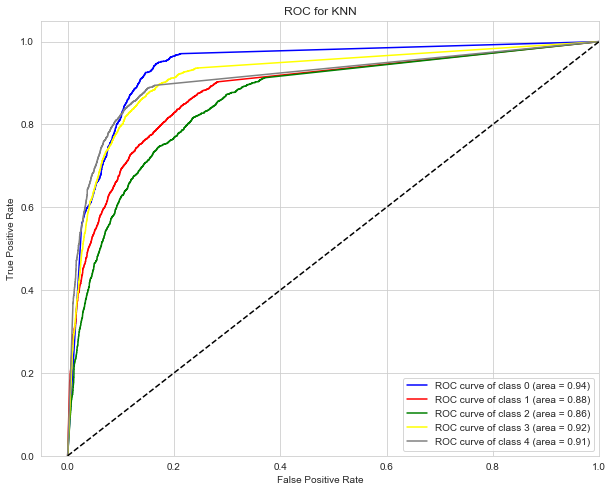

In [246]:
n_classes = y_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_roc[:, i], y_score_knn[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ('blue', 'red', 'green', 'yellow', 'gray')

plt.figure(figsize=(10, 8))
plt.savefig('DTC_ROC and AUC.pdf')

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for KNN')
plt.legend(loc="lower right")
plt.show()

### ROC for SVM

In [200]:
n_classes = y_bin.shape[1]

class_roc = OneVsRestClassifier(SVC(kernel='rbf', C=15, random_state= 42, probability=True))
y_score1 = class_roc.fit(X_pca140_roc, y_train_roc).decision_function(X_val_pca140_roc)

/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/Users/mokul791/anaconda3/lib/python3.7/site-p

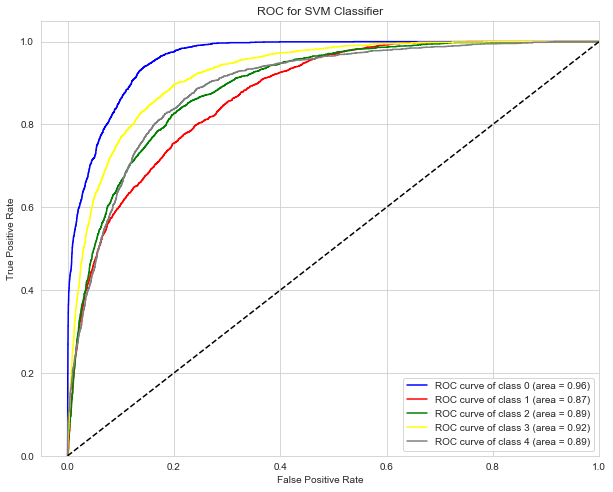

<Figure size 432x288 with 0 Axes>

In [239]:
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_roc[:, i], y_score1[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ('blue', 'red', 'green', 'yellow', 'gray')

plt.figure(figsize=(10, 8))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})' ''.format(i, roc_auc[i]))


# plt.figure(figsize=(10, 8))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for SVM Classifier')
plt.legend(loc="lower right")
plt.show()

plt.savefig('SVM_ROC and AUC.pdf')

### ROC for Decision Tree Classifier

In [232]:
class_dtc = OneVsRestClassifier(DecisionTreeClassifier(criterion='gini', max_depth= 12, random_state=42))
y_score_dtc = class_dtc.fit(X_pca140_roc, y_train_roc).predict_proba(X_val_pca140_roc)

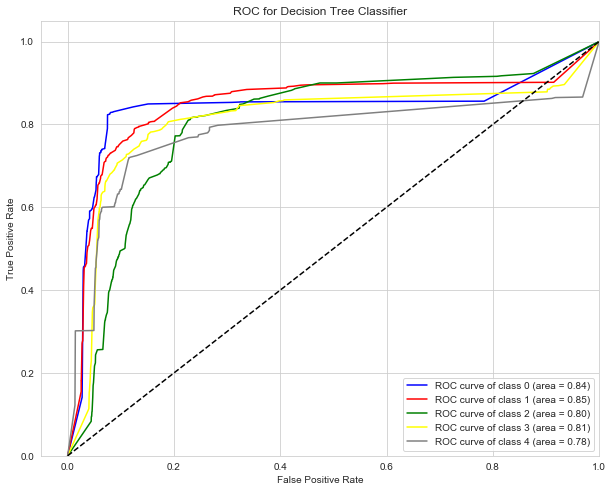

In [238]:
n_classes = y_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_roc[:, i], y_score_dtc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ('blue', 'red', 'green', 'yellow', 'gray')

plt.figure(figsize=(10, 8))
plt.savefig('DTC_ROC and AUC.pdf')

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()

### ROC for Random Forest

In [247]:
class_rfc = OneVsRestClassifier(RandomForestClassifier(n_estimators=650, random_state= 42))

In [248]:
y_score_rfc = class_rfc.fit(X_pca140_roc, y_train_roc).predict_proba(X_val_pca140_roc)

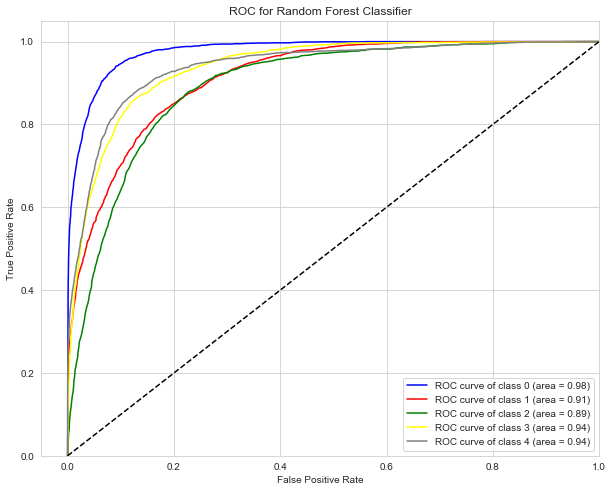

In [250]:
n_classes = y_bin.shape[1]
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_val_roc[:, i], y_score_rfc[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ('blue', 'red', 'green', 'yellow', 'gray')

plt.figure(figsize=(10, 8))
plt.savefig('DTC_ROC and AUC.pdf')

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))


plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC for Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

## Time Analysis of different classifier 

Time for different classifiers were save in a local excel file for easy comparision

In [89]:
time_df = pd.read_excel('time.xlsx')

In [90]:
time_df

,Classifier,Training,Test
0,KNN,36.58,811.55
1,SVM,856.82,244.32
2,DTC,18.69,0.13
3,DTC+Ada,897.04,1.54
4,RFC,480.90,4.45
5,RFC+Ada,452.35,3.67
6,GB+SL,1060.80,0.38
7,GB+Xgb,1594.18,0.92


Text(0.5, 1.0, 'Training time')

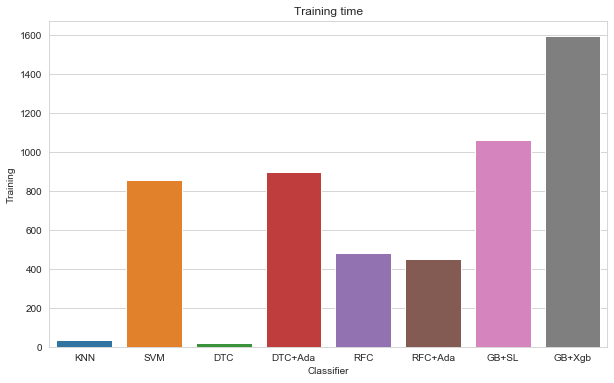

In [114]:
plt.figure(figsize=(10,6))
sns.barplot( x = 'Classifier',y = 'Training', data=time_df)
plt.title('Training time')

In [96]:
time_df1 = time_df.melt(id_vars='Classifier').rename(columns=str.title)

In [97]:
time_df1

,Classifier,Variable,Value
0,KNN,Training,36.58
1,SVM,Training,856.82
2,DTC,Training,18.69
3,DTC+Ada,Training,897.04
4,RFC,Training,480.90
5,RFC+Ada,Training,452.35
6,GB+SL,Training,1060.80
7,GB+Xgb,Training,1594.18
8,KNN,Test,811.55
9,SVM,Test,244.32


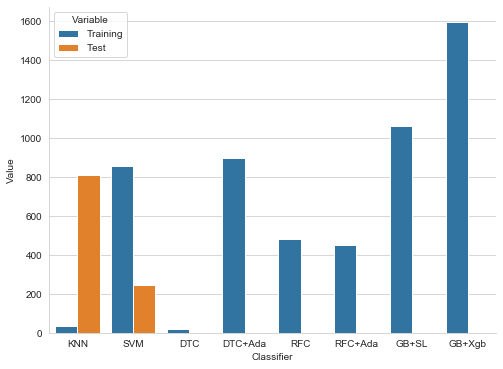

In [101]:
sns.set_style("whitegrid")
fig, ax1 = plt.subplots(figsize=(8,6))
sns.barplot(x='Classifier', y='Value', hue='Variable', data=time_df1, ax=ax1)
sns.despine(fig)